In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [38]:
from scipy.io import arff
train_data, train_meta = arff.loadarff("/Users/riddhishah/Documents/GitHub/Network_intrusion_detection_model/data/KDDTrain+.arff")
test_data, test_meta = arff.loadarff("/Users/riddhishah/Documents/GitHub/Network_intrusion_detection_model/data/KDDTest+.arff")

# Convert to pandas DataFrames
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [41]:
train_df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:xlabel='class', ylabel='count'>

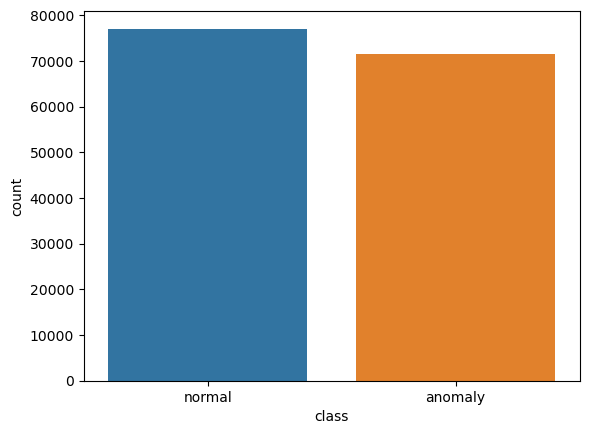

In [43]:
sns.countplot(x=y_train)

In [44]:
#check for missing columns and values
total = train_df.shape[0]
missing_columns = [col for col in train_df.columns if train_df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [45]:
print(f"Number of duplicate rows: {train_df.duplicated().sum()}")

Number of duplicate rows: 9


In [46]:
#encoding categorical columns
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

label_encoding(train_df)
label_encoding(test_df)

In [47]:
# Combine train and test data for preprocessing
data = pd.concat([train_df, test_df], axis=0)

# Separate features and target
X_train = data.drop('class', axis=1)
y_train = data['class']

1. Random forest classifier - for feature selection 

In [49]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [50]:
X_train = X_train[selected_features]

In [ ]:
#scaling features 
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test_df)

x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.75, random_state=42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(111387, 10)
(37130, 10)
(111387,)
(37130,)


2. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [55]:
lg_train, lg_test = log_reg.score(x_train , y_train), log_reg.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.8960920035551725
Test Score: 0.8966065176407217


3. K Nearest Neighbors

In [58]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train ,y_train)
y_pred= knn.predict(x_test)
accuracy_score(y_pred, y_test) 

/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9826286022084568

In [ ]:
KNN_train, KNN_test = knn.score(x_train, y_train), knn.score(x_test, y_test)

/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [60]:
print(f"Training Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Training Score: 0.9887419537288912
Test Score: 0.9826286022084568


4. Decision Tree classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
dec_tree.fit(x_train, y_train)
pred_dec_tree = dec_tree.predict(x_test)
accuracy_score(pred_dec_tree, y_test) 

0.9574198761109615

In [64]:
dt_train, dt_test = dec_tree.score(x_train, y_train), dec_tree.score(x_test, y_test)
print(f"Training Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Score: 0.9585229874222306
Test Score: 0.9574198761109615


5. Random Forest classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_score(y_pred_rf, y_test) 

0.9963641260436304

In [67]:
rf_train, rf_test = rf_model.score(x_train, y_train), rf_model.score(x_test, y_test)
print(f"Training Score: {rf_train}")
print(f"Test Score: {rf_test}")

Training Score: 0.9995600922908419
Test Score: 0.9963641260436304


In [69]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test],
        ["RandomForestClassifier", rf_train, rf_test]
]
col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════╤═══════════════╤══════════════╕
│ Model                  │   Train Score │   Test Score │
╞════════════════════════╪═══════════════╪══════════════╡
│ KNN                    │      0.988742 │     0.982629 │
├────────────────────────┼───────────────┼──────────────┤
│ Logistic Regression    │      0.896092 │     0.896607 │
├────────────────────────┼───────────────┼──────────────┤
│ Decision Tree          │      0.958523 │     0.95742  │
├────────────────────────┼───────────────┼──────────────┤
│ RandomForestClassifier │      0.99956  │     0.996364 │
╘════════════════════════╧═══════════════╧══════════════╛


Model Evaluation and comparisons

In [70]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

#Random Forest Classifier

rf = RandomForestClassifier()

In [71]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier'] = knn
models['LogisticRegression'] = lr
models['DecisionTreeClassifier'] = dtc
models['RandomForestClassifier'] = rf

In [72]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [73]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev, end="")

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.36 % +- 0.12Mean recall: 
 98.34 % +- 0.19**************** LogisticRegression Model Validation ****************
Mean precision: 
 86.95 % +- 0.39Mean recall: 
 94.13 % +- 0.27************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.58 % +- 0.09Mean recall: 
 99.58 % +- 0.07************** RandomForestClassifier Model Validation **************
Mean precision: 
 99.63 % +- 0.07Mean recall: 
 99.71 % +- 0.04

<AxesSubplot:>

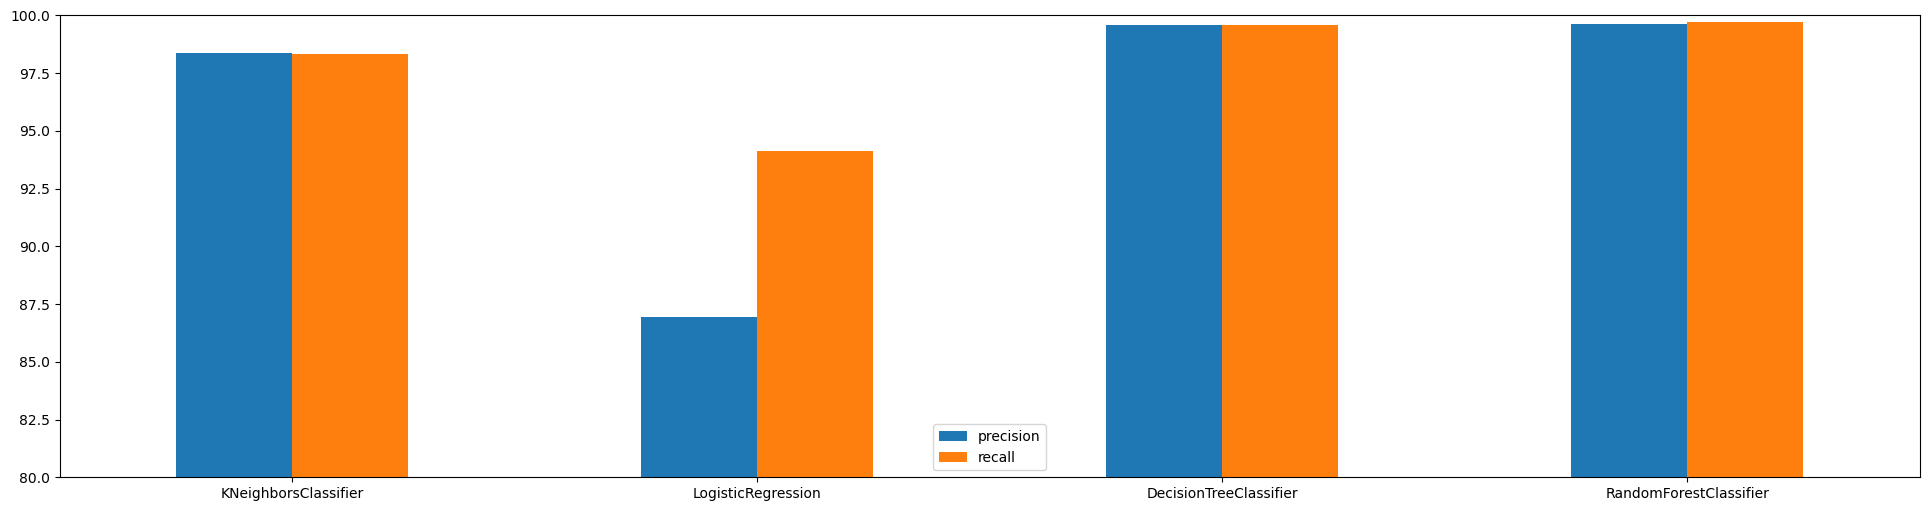

In [74]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [75]:

models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['RandomForestClassifier'] = rf

preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

/Users/riddhishah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predictions complete.


In [76]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[17561   301]
 [  344 18924]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98     17862
     anamoly       0.98      0.98      0.98     19268

    accuracy                           0.98     37130
   macro avg       0.98      0.98      0.98     37130
weighted avg       0.98      0.98      0.98     37130

**************** LogisticRegression Model Testing ****************
[[15124  2738]
 [ 1101 18167]]
----------------
              precision    recall  f1-score   support

      normal       0.93      0.85      0.89     17862
     anamoly       0.87      0.94      0.90     19268

    accuracy                           0.90     37130
   macro avg       0.90      0.89      0.90     37130
weighted avg       0.90      0.90      0.90     37130

************** DecisionTreeClassifier Model Testing **************
[[17783    79]
 [   91 19177]]
--------------
    

<AxesSubplot:>

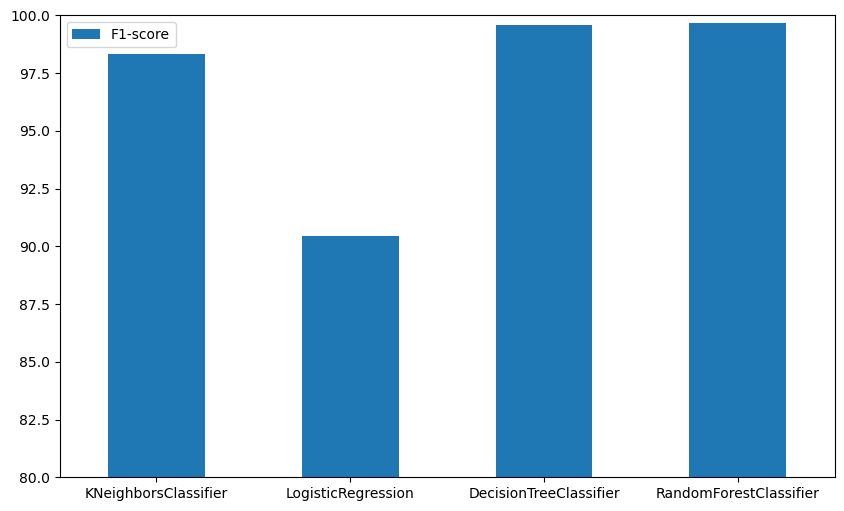

In [77]:

f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)